# A very straightforward notebook
### to bring together a range of useful basic data eng and data sci techniques

Contents:
  Import statement
  

### Broad import statement

In [12]:
# data sourcing:
import csv

# databases:
import sqlite3

# data toolkit:
import numpy as np
import pandas as pd

# plotting
import matplotlib

# CHEATSHEETS
[SQL Cheatsheet](https://learnsql.com/blog/ultimate-sql-cheat-sheet/All-sql-cheat-sheet-a4.pdf)

[Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

#

# Python Basics

In [7]:
# string methods:
# https://docs.python.org/3.7/tutorial/introduction.html#strings
a_string = "some. thing. thingy"
a_word = "thing"
a_substring = 'ing'
a_string.replace(" ", ", ") # replaces . with a ,
a_word in a_string # returns true if found
a_string.count(a_substring) # returns how many times a_substring occurs in a_string
a_string[-1] == "?" # true if ends with ?
a_string.strip() # removes trailing and preceding whitespace
a_string.capitalize()
first_name = "john"
last_name = "doe"
age = 33
"{} {} is {}".format(first_name.capitalize(), last_name.capitalize(), str(age)) # formatting string
f"string formats string {a_word} and ints {str(age)}"

'string formats string thing and ints 33'

# basic data structures:
- [Lists](https://docs.python.org/3.7/tutorial/introduction.html#lists), called _array_ in other languages
- [More on lists](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists)
- [List Comprehensions](https://docs.python.org/3.7/tutorial/datastructures.html#list-comprehensions)
- [Tuples](https://docs.python.org/3.7/tutorial/datastructures.html#tuples-and-sequences)
- [Dictionaries](https://docs.python.org/3.7/tutorial/datastructures.html#dictionaries), called _hash_ or _hashmap_ in other languages
- [Looping Techniques](https://docs.python.org/3.7/tutorial/datastructures.html#looping-techniques) with the `for` keyword

In [8]:
## remember, the following are found in the data-challenges-reboot 01-Python/01-Programming-Basics folder:
    # debugging
    # system parameters i.e: sys.argv[1]
    # environment variables, i.e: os.getenv("FLASK_ENV")

## Data Sourcing / Source data
### Found in 01-Python/02-Data-Sourcing

In [ ]:
# reading csv files into python (as list):

print("with csv.reader(file): \n")
with open('../data/phone_book.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count != 0: # ie. skip header
            print(', '.join('%s'%x for x in row))
        line_count += 1

In [ ]:
# reading csv files into python (as dict):

print("with csv.dictreader: \n")
with open('../data/phone_book.csv', mode='r') as csv_file:
    dict_reader = csv.DictReader(csv_file)
    for row in dict_reader:
        print(row.values())
        print(", ".join('%s'%x for x in row.values()))

In [13]:
# APIs and scraping: see examples in 01-Python/02-Data-Sourcing

# SQL and database basics
## use db:
### https://www.kaggle.com/datasets/hugomathien/soccer
 

### [SQL Cheatsheet](https://learnsql.com/blog/ultimate-sql-cheat-sheet/All-sql-cheat-sheet-a4.pdf)

### DBeaver:

In [ ]:
# install dbeaver with
# sudo add-apt-repository ppa:serge-rider/dbeaver-ce
# sudo apt-get update
# sudo apt-get install dbeaver-ce

# run from the command line with:
# dbeaver-ce

In [ ]:
# order of SQL operations matters:

![image.png](https://cdn.sisense.com/wp-content/uploads/image-1-order-blog.png)

In [3]:
# python access to database:
db_path_movies = '../data/movies.sqlite'
# import sqlite3
conn = sqlite3.connect(db_path_movies)
c = conn.cursor()

In [33]:
# SQL run the commands:
c.execute("SELECT * FROM directors")
rows = c.fetchall()
first_row = rows[0]
first_row[0]

'Georges Méliès'

In [4]:
# SQL fetch list of row elements:
conn = sqlite3.connect(db_path_movies)
conn.row_factory = sqlite3.Row
c = conn.cursor()

c.execute("SELECT * FROM directors")
rows = c.fetchall()
first_row = rows[0]

first_row['birth_year'] # table field names: name, birth_year, death_year, imdb_director_id, id
first_row.keys()

['name', 'birth_year', 'death_year', 'imdb_director_id', 'id']

In [42]:
tuple(first_row)

('Georges Méliès', 1861, 1938, 'nm0617588', 1)

In [43]:
list(first_row)

['Georges Méliès', 1861, 1938, 'nm0617588', 1]

In [47]:
# SQL use fetchone when relevant:
c.execute("SELECT * FROM directors WHERE directors.imdb_director_id = 'nm0000186'")
row = c.fetchone()
print(row[0], '-' ,row[1])

David Lynch - 1946


In [52]:
# SQL Projection - select columns in the query:
query = "SELECT d.id, d.name, d.birth_year FROM directors AS d"
# NB - alias

# SQL Selection- select row:
query = """
SELECT *
FROM directors AS d
WHERE d.name = 'D.W. Griffith'
"""
c.execute(query)
row = c.fetchone()
print(f'{row[0]} {row[1]} {row[2]} {row[3]} {row[4]}')

D.W. Griffith 1875 1948 nm0000428 4


In [53]:
# SQL  multiple selections:

query ="""SELECT *
FROM directors AS d
WHERE d.name = 'D.W. Griffith'
OR d.name = 'David Lynch'"""

query = """SELECT *
FROM directors AS d
WHERE d.name IN ('D.W. Griffith', 'David Lynch')"""

query ="""SELECT *
FROM movies AS m
WHERE UPPER(m.title) LIKE 'THE %'""" # all movies starting with "THE "

In [ ]:
# SQL counting
q = """SELECT COUNT(directors.id)
FROM directors
WHERE directors.birth_year >= 1980
"""

In [85]:
# SQL sorting:
q = """SELECT *
FROM directors AS d
ORDER BY d.birth_year DESC
LIMIT 10"""

In [100]:
query = """SELECT d.name
            FROM directors AS d
            ORDER BY d.name
            LIMIT 10"""
c.execute(query)
rows = c.fetchall()
first_row = rows[0]

print(rows)

# for r in rows:
#     print(f"{r[0]}")

[('A.R. Murugadoss',), ('Aamir Khan',), ('Aanand L. Rai',), ('Aaron Hann',), ('Aaron Harvey',), ('Aaron Horvath',), ('Aaron Lipstadt',), ('Aaron Moorhead',), ('Aaron Schneider',), ('Aaron Seltzer',)]


In [56]:
db_path_soccer = '../data/soccer.sqlite'
conn = sqlite3.connect(db_path_soccer)
conn.row_factory = sqlite3.Row
c = conn.cursor()

In [58]:
# GROUPING:
# Grouping rows on a given column C (aggregating rows with a function where values of C column are the same)

# how many matches played per country:
query = """SELECT COUNT(matches.id), matches.country_id
FROM "Match" AS matches
GROUP BY matches.country_id"""

c.execute(query)
row = c.fetchone()
print(f'{row[0]}')

1728


In [71]:
# What if we want to sort those results? We need an alias:
query1 = """SELECT COUNT(matches.id) AS match_count, matches.country_id
FROM "Match" AS matches
GROUP BY matches.country_id
ORDER BY match_count DESC"""

query2 = """SELECT COUNT(matches.id) AS match_count, matches.country_id
FROM "Match" AS matches
GROUP BY matches.country_id
HAVING match_count >= 3000
ORDER BY match_count DESC"""

c.execute(query2)
rows = c.fetchall()

for r in rows:
    print(f"Matches: {r['match_count']} Country id: {r['country_id']}")


Matches: 3040 Country id: 21518
Matches: 3040 Country id: 4769
Matches: 3040 Country id: 1729
Matches: 3017 Country id: 10257


In [76]:
# naming outcomes and calculating using CASE & END AS

# note conditional equals in SQL as single =

# How many matches were
    # won by the home team?
    # won by the away team?
    # finished with a draw?

query = """
SELECT
COUNT(matches.id) AS outcome_count,
CASE
    WHEN matches.home_team_goal > matches.away_team_goal
        THEN 'home_win'
    WHEN matches.home_team_goal = matches.away_team_goal
        THEN 'draw'
    ELSE 'away_win'
END AS outcome
FROM "Match" AS matches
GROUP BY outcome
ORDER BY outcome_count DESC"""

c.execute(query)
rows = c.fetchall()
first_row = rows[0]
first_row.keys()

for r in rows:
    print(f"{r['outcome_count']} {r['outcome']}")


11917 home_win
7466 away_win
6596 draw


In [84]:
# Querying multiple tables:

query = """
SELECT League.name as LeagueName, Country.name as CountryName
FROM League
JOIN Country ON League.country_id = Country.id"""

c.execute(query)
rows = c.fetchall()
first_row = rows[0]
first_row.keys()

for r in rows:
    print(f" {r['LeagueName']}") # including CountryName looks like a duplicate

 Belgium Jupiler League
 England Premier League
 France Ligue 1
 Germany 1. Bundesliga
 Italy Serie A
 Netherlands Eredivisie
 Poland Ekstraklasa
 Portugal Liga ZON Sagres
 Scotland Premier League
 Spain LIGA BBVA
 Switzerland Super League


In [ ]:
# string selection with SQL with (movies db):
exclude = 'cloverfield'
query = f'''SELECT m.title
        FROM movies AS m
        WHERE UPPER(title) LIKE '% LOVE %'
        OR UPPER(title) LIKE 'LOVE %'
        OR UPPER(title) LIKE 'LOVE,%'
        AND m.title NOT LIKE "%{exclude}%"
        ORDER BY m.title'''

In [ ]:
# doing maths on the fly and naming columns:
query = """SELECT d.name,
            (m.start_year - d.birth_year) age
            FROM directors AS d
            JOIN movies AS m ON m.director_id = d.id
            WHERE age IS NOT NULL
            ORDER BY age
            LIMIT 5
            """

In [ ]:
# numerical bucketing is simply done this way:
# 30 buckets achieved by / 30 + 1, with *30 gives the labels to time_range
query = """SELECT
        (minutes / 30 + 1)*30 time_range,
        COUNT(*)
    FROM movies
    WHERE minutes IS NOT NULL
    GROUP BY time_range"""
    # neat and quick

In [ ]:
# both the following queries achieve the same outcome
# 'query' was my solution, I just needed the LEFT JOIN to achieve the same as
# 'q_sol'
# the WITH new_table_name AS (SELECT * FROM table_x etc) is powerful
# this allows additional table definition on the fly

# The SQL Command: COALESCE returns the first non-null result in the list
# Used here to ensure 0 is returned if the count is null

query = f"""SELECT
        c.ContactName AS contact_name,
        COUNT(o.OrderID) NoOrders
        FROM Customers AS c
        LEFT JOIN Orders as o ON o.CustomerID = c.CustomerID
        GROUP BY contact_name
        ORDER BY NoOrders
        """

q_sol = """
    WITH no_orders AS (
        SELECT *
        FROM Customers c
        LEFT JOIN Orders o ON o.CustomerID = c.CustomerID
    )
    SELECT
        no_orders.ContactName
        ,COALESCE(COUNT(no_orders.OrderID), 0) AS number_orders
    FROM no_orders
    GROUP BY no_orders.CustomerID
    ORDER BY number_orders
    """

In [ ]:
# Window Functions like RANK or SUM with the OVER keyword.
# https://mode.com/sql-tutorial/sql-window-functions

'''Implement order_rank_per_customer to rank the orders of each
customer according to the order date.
For each customer, the orders should be ranked in the chronological order.
This function should return a list of tuples like
(OrderID, CustomerID, OrderDate, OrderRank).'''

# Simple rank in order of something, in this case date

query = f"""SELECT
    o.OrderID,
    c.CustomerID,
    o.OrderDate,
    RANK() OVER (PARTITION BY c.CustomerID
        ORDER BY o.OrderDate)
        AS OrderRank
    FROM Orders as o
    JOIN Customers AS c ON c.CustomerID = o.CustomerID
    """

'''Implement order_cumulative_amount_per_customer to compute the
cumulative amount (in USD) of the orders of each customer according
to the order date.
For each customer, the orders should be ranked in the chronological order.
This function should return a list of tuples like
(OrderID, CustomerID, OrderDate, OrderCumulativeAmount).'''

#

query = f"""
    WITH order_sum AS (
        SELECT
        o.OrderID,
        o.CustomerID,
        o.OrderDate,
        SUM(ROUND(od.UnitPrice * od.Quantity,2))
            OVER (PARTITION BY o.CustomerID
            ORDER BY o.OrderDate)
            AS OrderCumulativeAmount
        FROM Orders as o
        JOIN OrderDetails AS od ON od.OrderID = o.OrderID
        )
    SELECT *
    FROM order_sum
    GROUP BY order_sum.OrderID
    ORDER BY order_sum.CustomerID
    """

In [ ]:
# this shows double WITH, producing 2 tables, the general average just being a
# number

# TASK:
# return the customers who have an average purchase greater
# than the general average purchase
query = '''
    WITH OrderValues AS (
        SELECT
        SUM(od.UnitPrice * od.Quantity) AS value,
        od.OrderID
        FROM OrderDetails od
        GROUP BY od.OrderID
    ),
    generalaverage AS (
        SELECT
            ROUND(AVG(ov.value), 0) AS average
        FROM OrderValues ov
        )
    SELECT
        c.CustomerID
        ,ROUND(AVG(ov.value),2) AS customer_average
    FROM Customers as c
    JOIN Orders AS o ON o.CustomerID = c.CustomerID
    JOIN ordervalues AS ov ON ov.OrderID = o.OrderID
    GROUP BY c.CustomerID
    HAVING customer_average > (SELECT average FROM generalaverage)
    ORDER BY customer_average DESC
    '''

### NUMPY for arrays, series

[Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

In [1]:
import numpy as np

In [17]:
ten_zeros = np.zeros(10)
five_to_ten = np.arange(5,11)
A = np.array([[5,9,7], [1,0,3]])
B = np.ones((2,2), dtype = int)
lin_twenty = np.linspace(-1,1,20)
C = np.identity(3, dtype = int)
D = np.array([2,9,7,3,1,5], dtype = int)
E = np.reshape(D, (2,3))
f = np.identity(2, dtype = int)
F = np.tile(f,(4,4)) # makes 8x8 identity
G = np.random.random((4, 5))
reshaped_G = np.hsplit(G,5)[1] # split into list of arrays, from X columns
H = np.array([0, 4, -4, -3, 1, 1]).reshape(3, 2) # create arrays this way
I = np.array([[0, 1], [1, -1], [2, 3]]) # or this way

In [18]:
# PANDAS as PD

In [4]:
import pandas as pd
import matplotlib

In [6]:
# load data:
file = "../data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
df = gas_df
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [18]:
# Obvious Pandas EDA methods
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             121 non-null    datetime64[ns]
 1   U.S.                              121 non-null    int64         
 2   Alaska                            121 non-null    int64         
 3   Arkansas                          121 non-null    int64         
 4   Kansas                            121 non-null    int64         
 5   Other States                      121 non-null    int64         
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64         
 7   Wyoming                           121 non-null    int64         
 8   West Virginia                     121 non-null    int64         
 9   Utah                              121 non-null    int64         
 10  Pennsylvania                      121 non-null    

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [8]:
# some wider useful methods:
gas_df.Month = pd.to_datetime(gas_df.Month) # convert to datetime inplace
month_type = gas_df['Month'].dtype # check the datatype of a column
gas_df['Month'].dt.year.head() # access with dt if a datatime datatype
gas_df['Month'].dt.month.tail()

index_zero = gas_df.index[0] # access the index as list
first_entry = gas_df.iloc[0,0] # iloc can access any specific, slice etc

gas_df.columns[1:].sort_values() # see a selection of columns sorted

#renaming columns:
# gas_df.rename(columns={'previous_name':'new_name'}, inplace = True)


In [9]:
# AGGREGATE Methods

# Groupby can then be chained with many other methods:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()

In [13]:
# Boolean indexing:
filtered_yearly_gas_df = yearly_gas_df[np.logical_and(yearly_gas_df.index > 2008, yearly_gas_df.index < 2018)]

## PLOTTING GRAPHS MATPLOTLIB

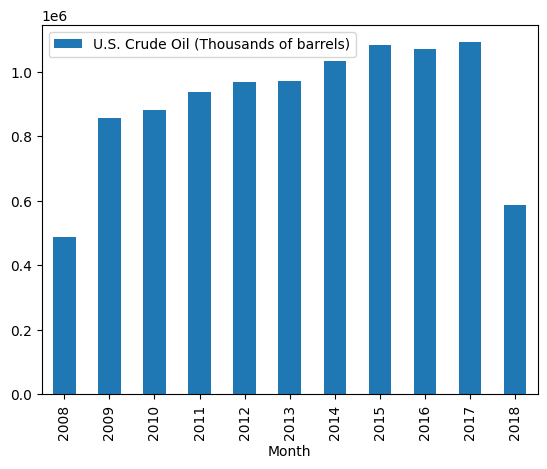

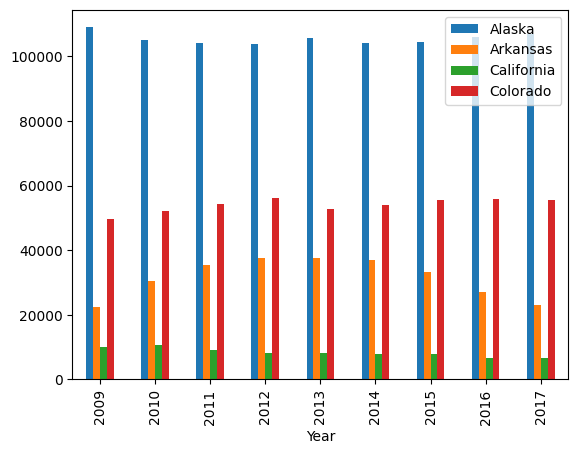

In [26]:
# firstly, quick plots using pandas:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
# or
plot.legend(['U.S. Crude Oil (Thousands of barrels)']);
plot = filtered_yearly_gas_df.filter(items=['Alaska', 'Arkansas', 'California', 'Colorado']).plot(kind="bar")
plot.set_xlabel("Year");

In [20]:
# load another df:
oil_df = pd.read_csv('../data/U.S._crude_oil_production.csv')
oil_df.Month = pd.to_datetime(oil_df.Month)
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum()
yearly_oil_df.rename(columns={'U.S. Crude Oil ':'U.S. Crude Oil'}, inplace = True)
filtered_yearly_oil_df = yearly_oil_df[np.logical_and(yearly_oil_df.index > 2008, yearly_oil_df.index < 2018)]

In [21]:
total_gas = filtered_yearly_gas_df.filter(['U.S.'])
total_oil = filtered_yearly_oil_df.filter(['U.S. Crude Oil'])

In [22]:
total_gas.rename(columns={'U.S.':'Gas'}, inplace = True)
total_oil.rename(columns={'U.S. Crude Oil':'Crude Oil'}, inplace = True)

# MERGE DATAFRAMES

In [24]:
merged_df = pd.concat((total_gas, total_oil), axis=1)
merged_df

,Gas,Crude Oil
Month,,
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585
2014,1032439,105064
2015,1082158,113179
2016,1070085,105970
2017,1090730,112205


In [ ]:
plot = merged_df.plot(kind="bar")
plot.set_xlabel("Year");
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)']);